# Introduction

**Dataset**: Lahman Baseball Database (2025)  
**License**: Creative Commons Attribution-ShareAlike 3.0 Unported  
**Coverage**: MLB stats from 1871–2024 across batting, fielding, and pitching



### About the Data

This database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2024. It includes data from the two current leagues (American and National), four other historical major leagues (American Association, Union Association, Players League, and Federal League), and the National Association (1871–1875).


###  Objective

Provide data-backed insights into positional power trends over time to support decision-making for fantasy players, baseball fans, and analysts evaluating offensive consistency.


### Goals

- Quantify HR output by position across eras  
- Identify trends in positional power growth  
- Highlight player archetypes using debut age and career length  
- Support strategic decision-making for fantasy drafts and fan education



### Intended Audience

- Fantasy baseball participants  
- Baseball analysts and journalists  
- Scouts and player development staff  
- MLB fans and historians



##  Scope & Limitations

* **Pitchers were excluded** from this analysis because they have historically contributed negligible offensive output. This exclusion also reflects rule changes: the **American League (AL)** adopted the **Designated Hitter (DH)** in 1973, while the **National League (NL)** only did so in 2022. Since then, **pitchers have been eliminated from batting entirely**, reducing their relevance in long-term home run trends.

* **Designated Hitters (DH)** are not shown as a separate position. In the Lahman dataset, DHs are inconsistently labeled — especially before universal adoption — and many served as DHs part-time while fielding another position. This makes it difficult to isolate DH-only impact across decades. Prominent DHs (e.g., **David Ortiz**, **Edgar Martínez**) are typically categorized by their primary defensive role.

* **Shohei Ohtani**, despite being one of MLB’s most iconic modern power hitters, is classified as a **pitcher** in the dataset due to his two-way status. As a result, he does not appear in position-specific summaries, even though his home run totals would qualify him among elite designated hitters or outfielders.

* The **universal adoption of the DH in the NL (2022)** is a **recent structural change** that may increase league-wide home run totals going forward. By replacing pitcher at-bats with power-capable hitters, the DH rule expands offensive opportunity. However, there is not yet enough post-2022 data to meaningfully analyze its long-term effect on positional power output. This will be important to monitor in future updates.

These design decisions were made to support **clean, consistent position-based comparisons** across the full historical range of the data.


# Prepare and Process Data for Analysis

## Prepare

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(readr) # Load readr package for clean and fast CSV reading

# Define the path to the folder where the CSVs are stored - make easier to reuse path later
lahman_dir <- "/kaggle/input/lahman-baseball-database/lahman_1871-2024_csv"

# Create list of all .csv files in that directory, with full file paths - gets lists of all Lahman CSVs
csv_files <- list.files(
  path = lahman_dir,         # where to look
  pattern = "\\.csv$",       # only include files that end in .csv
  full.names = TRUE          # return full path (not just the file name)
)

# Define helper function to turn filenames into usable table names 
clean_table_name <- function(filename) {
  tools::file_path_sans_ext(basename(filename)) #basename strips off folder path, file_path_sans_ext - removes csv extension
}

# lapply() to read CSV into a data frame, setNames() + sapply() to name each list element with the cleaned table name
lahman <- setNames(
  lapply(csv_files, read_csv, show_col_types = FALSE),  # read all CSVs as data frames
  sapply(csv_files, clean_table_name)                   # get cleaned names for each element
)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


## EDA/Process

In [2]:
#Look over column names of main CSV files to be used
colnames(lahman$People)
colnames(lahman$Batting)
colnames(lahman$Fielding)

[1] "ID"           "playerID"     "birthYear"    "birthMonth"   "birthDay"    
 [6] "birthCity"    "birthCountry" "birthState"   "deathYear"    "deathMonth"  
[11] "deathDay"     "deathCountry" "deathState"   "deathCity"    "nameFirst"   
[16] "nameLast"     "nameGiven"    "weight"       "height"       "bats"        
[21] "throws"       "debut"        "bbrefID"      "finalGame"    "retroID"

[1] "playerID"  "yearID"    "stint"     "teamID"    "lgID"      "G"        
 [7] "G_batting" "AB"        "R"         "H"         "2B"        "3B"       
[13] "HR"        "RBI"       "SB"        "CS"        "BB"        "SO"       
[19] "IBB"       "HBP"       "SH"        "SF"        "GIDP"      "G_old"

[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "POS"     
 [7] "G"        "GS"       "InnOuts"  "PO"       "A"        "E"       
[13] "DP"       "PB"       "WP"       "SB"       "CS"       "ZR"

In [3]:
#look at data formatting
glimpse(lahman$People)
glimpse(lahman$Batting)
glimpse(lahman$Fielding)

Rows: 21,271
Columns: 25
$ ID           <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20777, 11, 12, 13, 14, 15,…
$ playerID     <chr> "aardsda01", "aaronha01", "aaronto01", "aasedo01", "abada…
$ birthYear    <dbl> 1981, 1934, 1939, 1954, 1972, 1985, 1850, 1877, 1869, 186…
$ birthMonth   <dbl> 12, 2, 8, 9, 8, 12, 11, 4, 11, 10, 6, 9, 3, 10, 2, 8, 9, …
$ birthDay     <dbl> 27, 5, 5, 8, 25, 17, 4, 15, 11, 14, 1, 20, 16, 22, 16, 17…
$ birthCity    <chr> "Denver", "Mobile", "Mobile", "Orange", "Palm Beach", "La…
$ birthCountry <chr> "USA", "USA", "USA", "USA", "USA", "D.R.", "USA", "USA", …
$ birthState   <chr> "CO", "AL", "AL", "CA", "FL", "La Romana", "PA", "PA", "V…
$ deathYear    <dbl> NA, 2021, 1984, NA, NA, NA, 1905, 1957, 1962, 1926, NA, N…
$ deathMonth   <dbl> NA, 1, 8, NA, NA, NA, 5, 1, 6, 4, NA, NA, 2, 6, NA, NA, N…
$ deathDay     <dbl> NA, 22, 16, NA, NA, NA, 17, 6, 11, 27, NA, NA, 13, 11, NA…
$ deathCountry <chr> NA, "USA", "USA", NA, NA, NA, "USA", "USA", "USA", "USA",…
$ deathState   

Rows: 115,450
Columns: 24
$ playerID  <chr> "aardsda01", "aardsda01", "aardsda01", "aardsda01", "aardsda…
$ yearID    <dbl> 2004, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2015, 1954, …
$ stint     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ teamID    <chr> "SFN", "CHN", "CHA", "BOS", "SEA", "SEA", "NYA", "NYN", "ATL…
$ lgID      <chr> "NL", "NL", "AL", "AL", "AL", "AL", "AL", "NL", "NL", "NL", …
$ G         <dbl> 11, 45, 25, 47, 73, 53, 1, 43, 33, 122, 153, 153, 151, 153, …
$ G_batting <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ AB        <dbl> 0, 2, 0, 1, 0, 0, 0, 0, 1, 468, 602, 609, 615, 601, 629, 590…
$ R         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 58, 105, 106, 118, 109, 116, 102,…
$ H         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 131, 189, 200, 198, 196, 223, 172…
$ `2B`      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 37, 34, 27, 34, 46, 20, 39, 2…
$ `3B`      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 9, 14, 6, 4, 7, 11, 10, 6, 4, …
$ HR        <d

Rows: 153,656
Columns: 18
$ playerID <chr> "aardsda01", "aardsda01", "aardsda01", "aardsda01", "aardsda0…
$ yearID   <dbl> 2004, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2015, 1954, 1…
$ stint    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ teamID   <chr> "SFN", "CHN", "CHA", "BOS", "SEA", "SEA", "NYA", "NYN", "ATL"…
$ lgID     <chr> "NL", "NL", "AL", "AL", "AL", "AL", "AL", "NL", "NL", "NL", "…
$ POS      <chr> "P", "P", "P", "P", "P", "P", "P", "P", "P", "OF", "2B", "OF"…
$ G        <dbl> 11, 45, 25, 47, 73, 53, 1, 43, 33, 116, 27, 126, 152, 150, 15…
$ GS       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 113, 26, 125, 152, 150, 153, 5, 14…
$ InnOuts  <dbl> 32, 159, 97, 146, 214, 149, 3, 119, 92, 3093, 709, 3329, 4048…
$ PO       <dbl> 0, 1, 2, 3, 2, 2, 0, 1, 0, 223, 86, 254, 316, 346, 305, 2, 26…
$ A        <dbl> 0, 5, 4, 6, 5, 3, 0, 5, 1, 5, 84, 9, 17, 9, 12, 10, 12, 0, 13…
$ E        <dbl> 0, 0, 1, 0, 0, 1, 0, 0, 1, 7, 6, 9, 13, 6, 5, 0, 5, 0, 6, 0, …
$ DP       <db

`geom_smooth()` using formula = 'y ~ x'


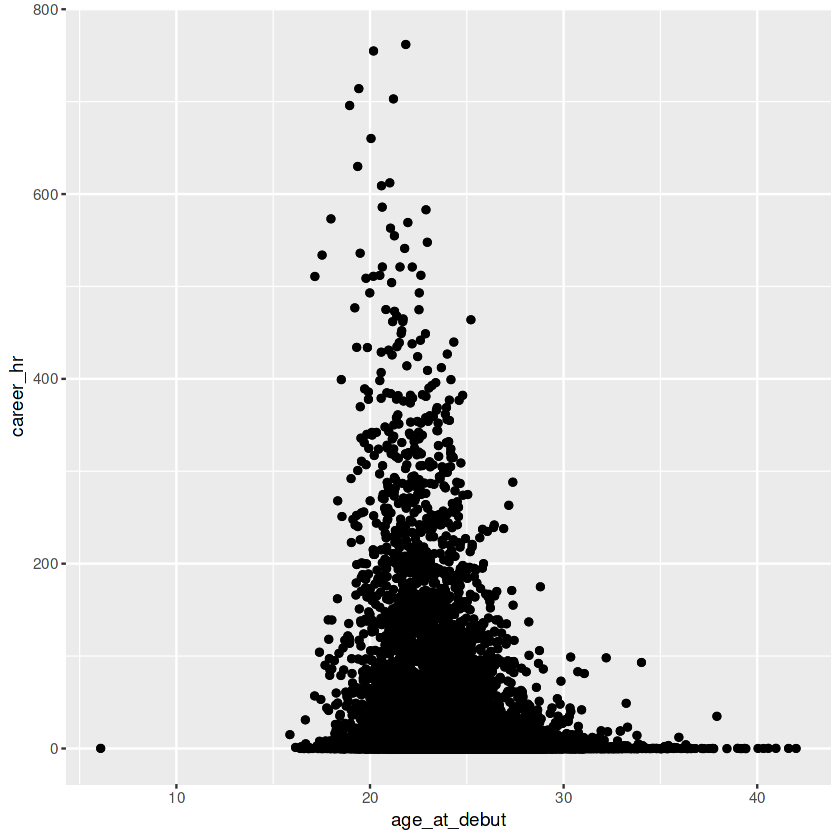

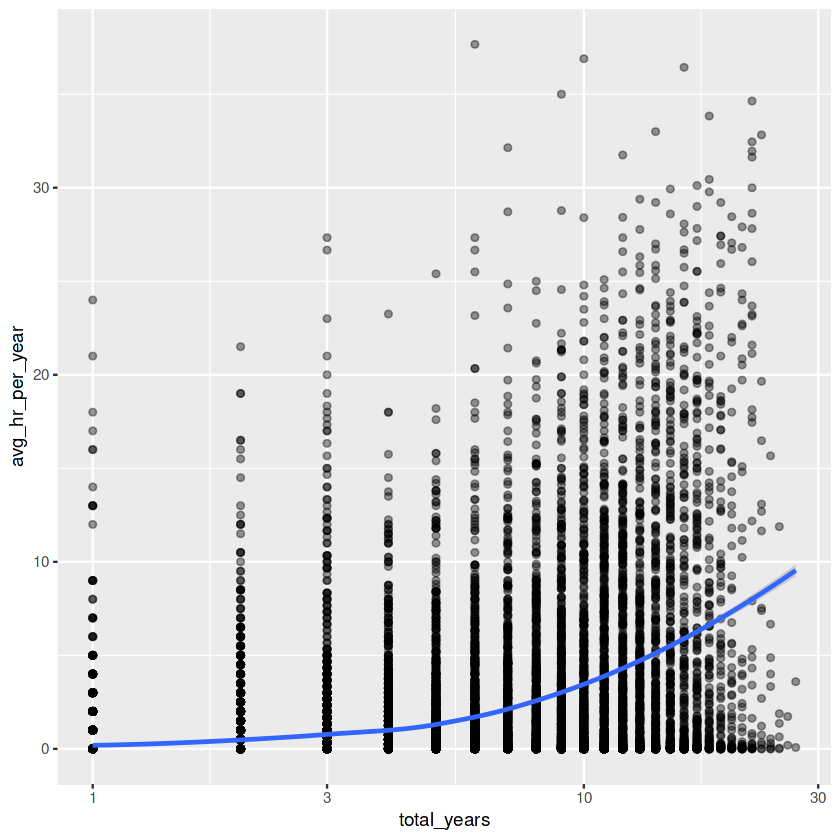

In [4]:
debut_data <- lahman$People %>%
  mutate(
    debut = as.Date(debut),
    birthDate = as.Date(paste(birthYear, birthMonth, birthDay, sep = "-")),
    age_at_debut = as.numeric(difftime(debut, birthDate, units = "days")) / 365.25
  ) %>%
  drop_na(age_at_debut) %>%
  filter(is.finite(age_at_debut))

career_hr <- lahman$Batting %>%
  group_by(playerID) %>%
  summarise(career_hr = sum(HR, na.rm = TRUE),
            total_years = n_distinct(yearID), .groups = "drop")
         
debut_hr_data <- debut_data %>%
inner_join(career_hr, by = "playerID") %>%
drop_na(career_hr) #drop players who never hit a HR

#check coorelation between debut age and career hr
debut_hr_data %>%
ggplot(aes(age_at_debut, career_hr)) + geom_point() + geom_jitter() 

avg_hr <- career_hr %>%
filter(total_years > 0) %>%
mutate(avg_hr_per_year = career_hr / total_years)

#check coorelation between years played and avg hr
ggplot(avg_hr, aes(x = total_years, y = avg_hr_per_year)) +
 geom_point(alpha = 0.4) +
  geom_smooth(method = "loess") +
scale_x_log10()



# Analysis

## When and How Power Hitters Debut

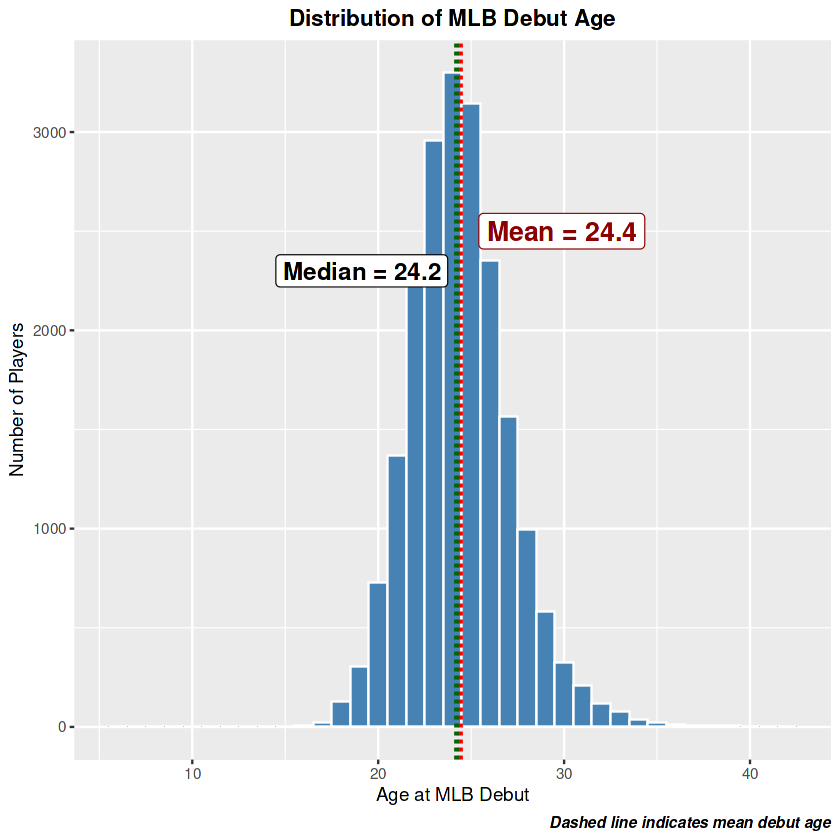

In [5]:

# Prepare data
debut_data <- lahman$People %>%
  mutate(
    debut = as.Date(debut),
    birthDate = as.Date(paste(birthYear, birthMonth, birthDay, sep = "-")),
    age_at_debut = as.numeric(difftime(debut, birthDate, units = "days")) / 365.25
  ) %>%
  drop_na(age_at_debut) %>%
  filter(is.finite(age_at_debut))

# Calculate mean debut age
mean_age <- mean(debut_data$age_at_debut, na.rm = TRUE)
median_age <- median(debut_data$age_at_debut, na.rm = TRUE)

# Plot with histogram and vertical mean/median line + label
ggplot(debut_data, aes(x = age_at_debut)) +
  geom_histogram(binwidth = 1, color = "white", fill = "steelblue") +
  geom_vline(aes(xintercept = mean_age),
             color = "red", linetype = "dashed", linewidth = 1) +
  annotate("label",
           x = mean_age + 1,
           y = 2500,  
           label = paste0("Mean = ", round(mean_age, 1)),
           color = "darkred", angle = 0, size = 5.5, hjust = 0, fontface = "bold") +
  geom_vline(aes(xintercept = median_age), color = "darkgreen", linetype = "dashed", linewidth = 1) +
  annotate("label",
           x = median_age - 0.5,
           y = 2300,
           label = paste0("Median = ", round(median_age, 1)),
           color = "black", fill = "white", fontface = "bold", size = 5, hjust = 1) +
  labs(title = "Distribution of MLB Debut Age",
    x = "Age at MLB Debut",
    y = "Number of Players",
    caption = "Dashed line indicates mean debut age")  +
theme(plot.caption = element_text(hjust = 1, face = "bold.italic", size = 9),
     plot.title = element_text(hjust=0.5, face = "bold"))




`geom_smooth()` using formula = 'y ~ x'


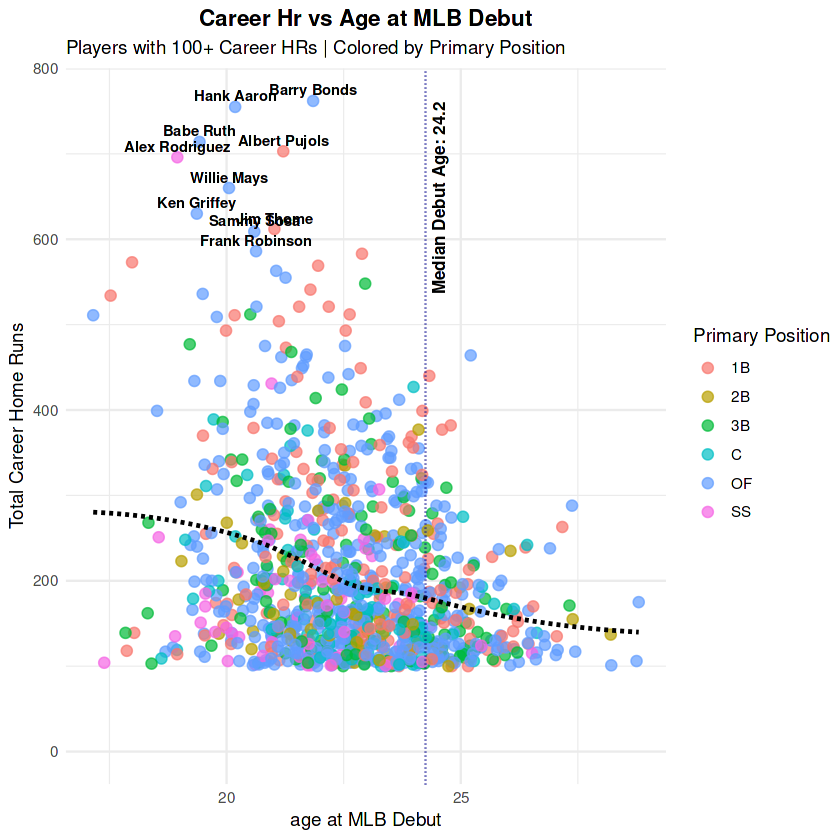

In [6]:
#Get age at debut
debut_data <- lahman$People %>%
  mutate( debut = as.Date(debut),
    birthDate = as.Date(paste(birthYear, birthMonth, birthDay, sep = "-")),
    age_at_debut = as.numeric(difftime(debut, birthDate, units = "days")) / 365.25) %>%
  select(playerID, age_at_debut, nameFirst, nameLast) %>%
  filter(is.finite(age_at_debut)) %>%
  mutate(full_name = paste(nameFirst, nameLast))

#Get career HR
career_hr <- lahman$Batting %>%
  group_by(playerID) %>%
  summarise(career_hr = sum(HR, na.rm = TRUE), .groups = "drop")

#Get primary position
primary_pos <- lahman$Fielding %>%
  group_by(playerID, POS) %>%
  summarise(games = sum(G, na.rm = TRUE), .groups = "drop") %>%
  group_by(playerID) %>%
  slice_max(games, n = 1, with_ties = FALSE) %>%
  ungroup()

# Merge career hr's and primary pos
debut_hr_data <- debut_data %>%
  left_join(career_hr, by = "playerID") %>%
  left_join(primary_pos, by = "playerID")

# Identify top 10 HR hitters (for labeling purposes)
top_10_hr <- debut_hr_data %>%
  slice_max(career_hr, n = 10) %>%
  pull(playerID)

#create scatterplot
debut_hr_data %>%
filter(POS != "P", career_hr >=100) %>% #filtered out pitchers and to >= 100 career home runs
drop_na(POS) %>% #remove na position values
ggplot(aes(age_at_debut, career_hr)) + geom_point(aes(color=POS), alpha = 0.7, size = 2.5) +
geom_text(data = debut_hr_data %>%  #adding player names annotaation
          filter(playerID %in% top_10_hr),
         aes(label = full_name),
         vjust = -0.5, size = 3, fontface = "bold") +
geom_smooth(method = "loess", se = FALSE, color = "black", linetype = "dashed") +
scale_y_continuous(limits = c(0, NA)) +
geom_vline(xintercept = median(debut_hr_data$age_at_debut, na.rm = TRUE), #add age line at median debut
           linetype = "dotted", color = "darkblue") +
annotate("text",
         x = median(debut_hr_data$age_at_debut, na.rm = TRUE),
         y = max(debut_hr_data$career_hr, na.rm = TRUE),
         label = paste("Median Debut Age:", round(median_age, 1)), #round median age to one decimal
         angle = 90, vjust = 1.5, hjust = 1, size = 3.5, color = "black", fontface = "bold") + #adjust placement to not affect overlay
labs(title = "Career Hr vs Age at MLB Debut", x = "age at MLB Debut", y = "Total Career Home Runs",
    color = "Primary Position", subtitle = "Players with 100+ Career HRs | Colored by Primary Position") +
theme_minimal() + theme(plot.title = element_text(hjust=0.5, face = "bold"))


This section explores **when power hitters debut** and how **age at debut relates to long-term home run production**. The histogram provides a baseline distribution of debut age, while the scatterplot compares debut age directly against career HR totals for players with **100+ HR**.

**Observations:**

* Most MLB players debut between ages **20 and 24**, with both the **mean and median** clustering around **age 24** — forming a natural baseline for evaluating player timelines and development arcs.

* Players who **debut earlier** tend to **achieve higher career HR totals**. The scatterplot shows a **subtle negative trend**, suggesting that earlier call-ups may reflect **greater raw talent or long-term durability**.

* This pattern isn’t universal. Several **outfielders and first basemen** reached elite HR totals **despite debuting closer to or after the median age** — likely due to **offensive-first development curves** and **lower early-career defensive demands**.

* More **defensively demanding roles** (e.g., **shortstop, catcher**) may require **earlier debuts** to accumulate comparable totals — or show **less upside when debuting late**.

* Outliers such as the **top 10 HR hitters** (labeled in the scatter) reinforce the relationship: **nearly all debuted early** and sustained long careers, making **age-at-debut a potentially useful proxy for elite slugging potential**.


## Career Length by Position
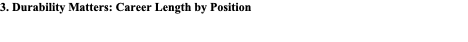
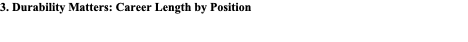
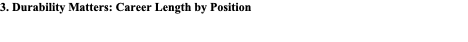
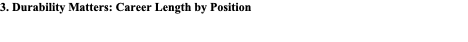

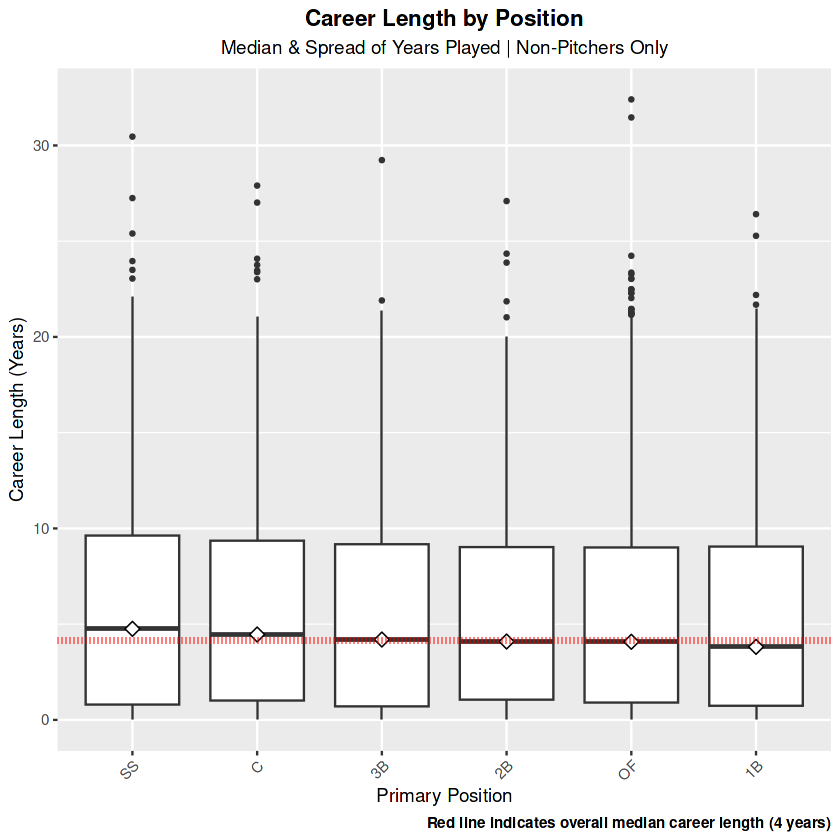

In [7]:
# Create career_length from People table
career_df <- lahman$People %>%
  mutate(
    debut = as.Date(debut),
    finalGame = as.Date(finalGame),
    career_length = as.numeric(difftime(finalGame, debut, units = "days")) / 365.25
  ) %>%
  filter(is.finite(career_length), career_length > 0) %>%
  select(playerID, career_length)

# Get primary position from Fielding table
primary_pos <- lahman$Fielding %>%
  group_by(playerID, POS) %>%
  summarise(games = sum(G, na.rm = TRUE), .groups = "drop") %>%
  group_by(playerID) %>%
  slice_max(games, n = 1, with_ties = FALSE) %>%
  ungroup()

# Merge career length with position
career_pos <- career_df %>%
  inner_join(primary_pos, by = "playerID") %>%
  filter(POS != "P")  # Optional: remove pitchers

# Plot density by position
ggplot(career_pos, aes(x = reorder(POS, -career_length, median), y = career_length)) +
  geom_boxplot(outlier.size = 0.8, alpha = 1) +
  stat_summary(fun = median, geom = "point", shape = 23, size = 3, fill = "white") +
geom_hline(yintercept = median(career_pos$career_length, na.rm = TRUE), 
           linetype = "dotted", color = "red", linewidth = 1.5) +
  labs(
    title = "Career Length by Position",
    subtitle = "Median & Spread of Years Played | Non-Pitchers Only",
    caption = "Red line indicates overall median career length (4 years)",
    x = "Primary Position",
    y = "Career Length (Years)") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    plot.caption = element_text(face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none")




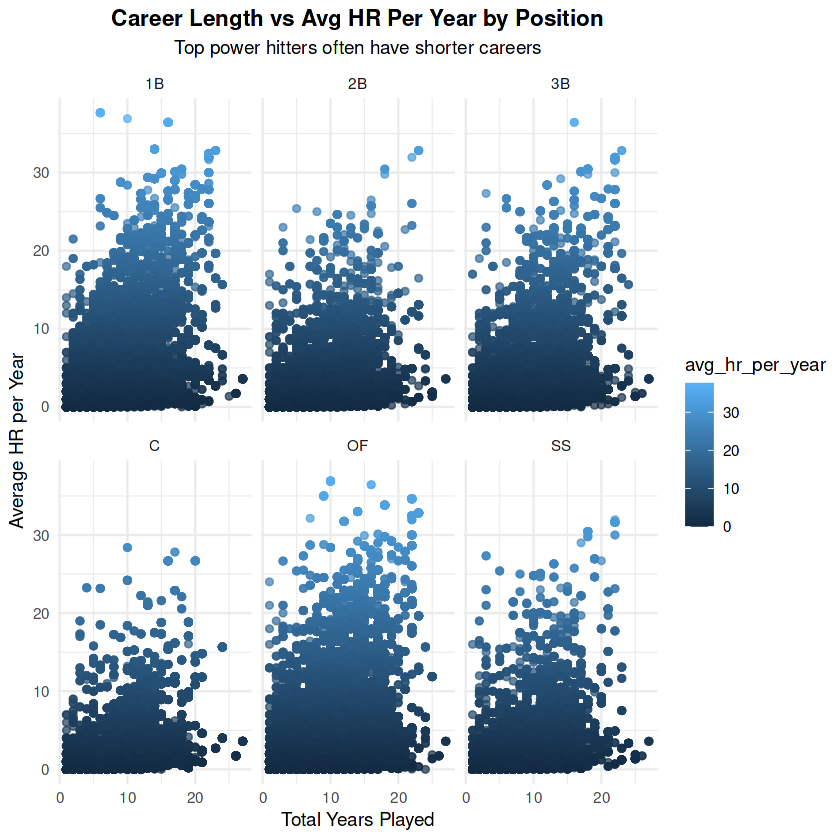

In [8]:
#prepare data
avg_home_runs <- lahman$Batting %>%
  group_by(playerID) %>%
  summarise(
    career_hr = sum(HR, na.rm = TRUE),
    total_years = n_distinct(yearID)
  ) %>%
  filter(total_years > 0) %>%  # Avoid division by 0
  mutate(avg_hr_per_year = career_hr / total_years) 
#join data to Fielding table
avg_home_runs <- avg_home_runs %>%
left_join(lahman$Fielding, by = "playerID")

# Plot 
avg_home_runs %>%
  filter(POS != "P", POS != "NA") %>%
  ggplot(aes(total_years, avg_hr_per_year)) +
  geom_point(aes(color = avg_hr_per_year), alpha = 0.7)  + 
  facet_wrap(~ POS) +
  labs(
    title = "Career Length vs Avg HR Per Year by Position",
    subtitle = "Top power hitters often have shorter careers",
    x = "Total Years Played", y = "Average HR per Year") +
  theme_minimal() + 
theme(
    plot.title = element_text(hjust=0.5, face="bold"),
    plot.subtitle = element_text(hjust=0.5))


This section explores **how career length varies by position** and how it correlates with **power consistency over time**. The boxplot highlights career length distributions, while the scatterplot compares average HR/year against years played for each position.

**Observations:**

* Most positions have a **median career length of around 4 years**, but **shortstops (SS)** and **catchers (C)** show slightly **higher medians**, indicating marginally greater durability on average.

* **Outfielders (OF)** stand out with a **broader spread** and a **notable number of long-career outliers**. This is partly explained by sample size—OF is by far the **largest position group** in the dataset, which naturally increases the likelihood of extreme values. But it also reflects the position’s **offensive versatility** and potential for longer careers among productive hitters.

* Interestingly, **top HR producers at several positions** (e.g., **2B, SS, C**) often have **shorter-than-average careers**, hinting at **position-specific wear** or **power peaks concentrated in early seasons**.

* This suggests that while long careers can support consistent HR accumulation, **elite power output often appears in shorter, high-impact windows**—particularly for players in more physically demanding or defensively focused roles.


## Measuring Power Output
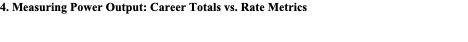
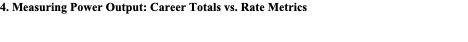
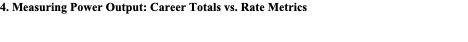
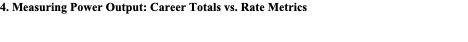

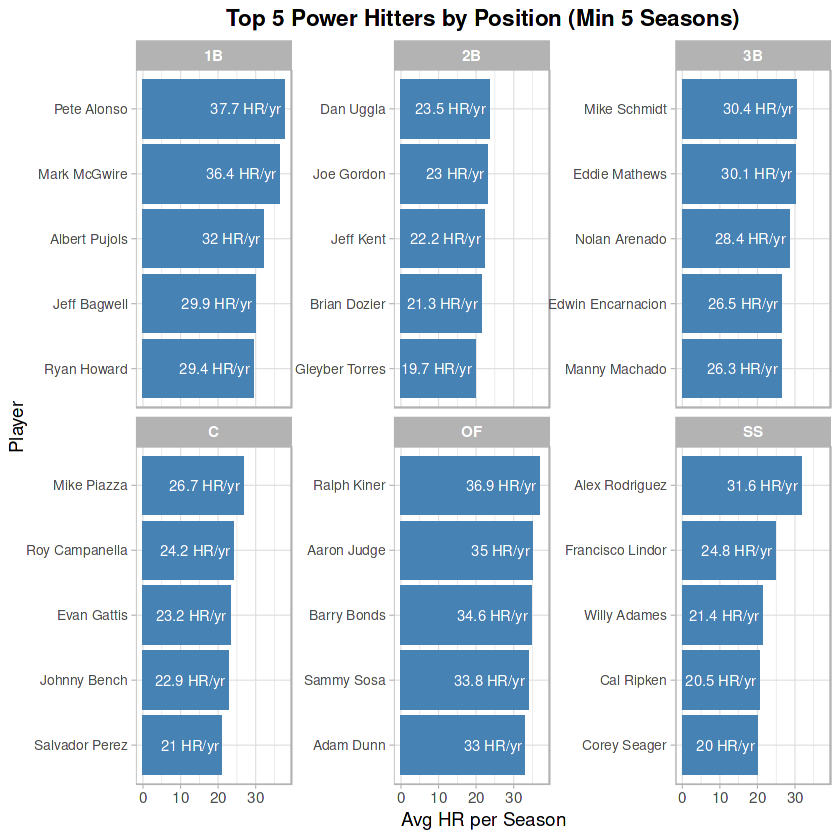

In [9]:
# Get primary position per player
primary_pos <- lahman$Fielding %>%
  group_by(playerID, POS) %>%
  summarise(games = sum(G, na.rm = TRUE), .groups = "drop") %>%
  group_by(playerID) %>%
  slice_max(order_by = games, n = 1, with_ties = FALSE) %>%
  ungroup()

# Summarise career HR + seasons played
career_stats <- lahman$Batting %>%
  group_by(playerID) %>%
  summarise(
    career_hr = sum(HR, na.rm = TRUE),
    total_years = n_distinct(yearID),
    .groups = "drop"
  ) %>%
  filter(total_years > 0) %>%
  mutate(avg_hr_per_year = career_hr / total_years)

# Join with player names and positions
output <- career_stats %>%
  left_join(primary_pos, by = "playerID") %>%
  left_join(
    lahman$People %>%
      select(playerID, nameFirst, nameLast) %>%
      mutate(full_name = paste(nameFirst, nameLast)),
    by = "playerID"
  ) %>%
  select(playerID, full_name, POS, career_hr, total_years, avg_hr_per_year) %>%
  arrange(desc(avg_hr_per_year)) 

#top 5 HR Hitters by Position
top5_by_pos <- output %>%
  filter(total_years >= 5) %>% # Filter for at least 5 seasons
  filter(POS != "P") %>% #Filter out pitchers since not relevant
  group_by(POS) %>%
  slice_max(avg_hr_per_year, n = 5, with_ties = FALSE) %>%  # Top 5 per position
  arrange(POS, desc(avg_hr_per_year)) %>%
  ungroup() 

#plot
ggplot(top5_by_pos, aes(x = reorder(full_name, avg_hr_per_year), y = avg_hr_per_year)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
geom_text(aes(label= paste0(round(avg_hr_per_year,1), " HR/yr")), hjust=1.05, color = "white", size = 3) +
  facet_wrap(~ POS, scales = "free_y") +  # Facet by position
  labs(
    title = "Top 5 Power Hitters by Position (Min 5 Seasons)",
    x = "Player",
    y = "Avg HR per Season") + 
theme_light() +
  theme(
    strip.text = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.y = element_text(size = 8))



This faceted bar chart showcases the top 5 power hitters by average HR per season within each primary position (minimum 5 seasons played). It gives insight into positional power ceilings and the types of players who have defined slugging excellence at their respective spots.

**Observations:**

* **Pete Alonso** leads all players in the dataset with an astounding **37.7 HR/year average** at first base, highlighting how modern power hitters can redefine positional expectations.

* At **shortstop**, **Alex Rodriguez** stands out with **31.6 HR/year**, a **full 7+ HR ahead of the next closest** SS, underscoring how singular his offensive profile was at a traditionally defense-first position.

* **Mike Piazza**, the top catcher, continues to hold the standard for power behind the plate.

* **Joe Gordon**, who played from 1938–1950, still holds the top spot at second base. Despite shifts in training, ballpark dimensions, and era effects, no one has surpassed his per-season HR rate; a testament to his production in a different baseball era.

* **Nine of the players shown remain active as of 2025**, illustrating that modern hitters continue to push positional power ceilings higher.

* While some positions (like SS) show a sharp drop-off after the top slugger, others, like **OF**, feature a **tight cluster of elite hitters**, with several players averaging 33+ HR per season.


Attaching package: ‘cowplot’




The following object is masked from ‘package:lubridate’:

    stamp




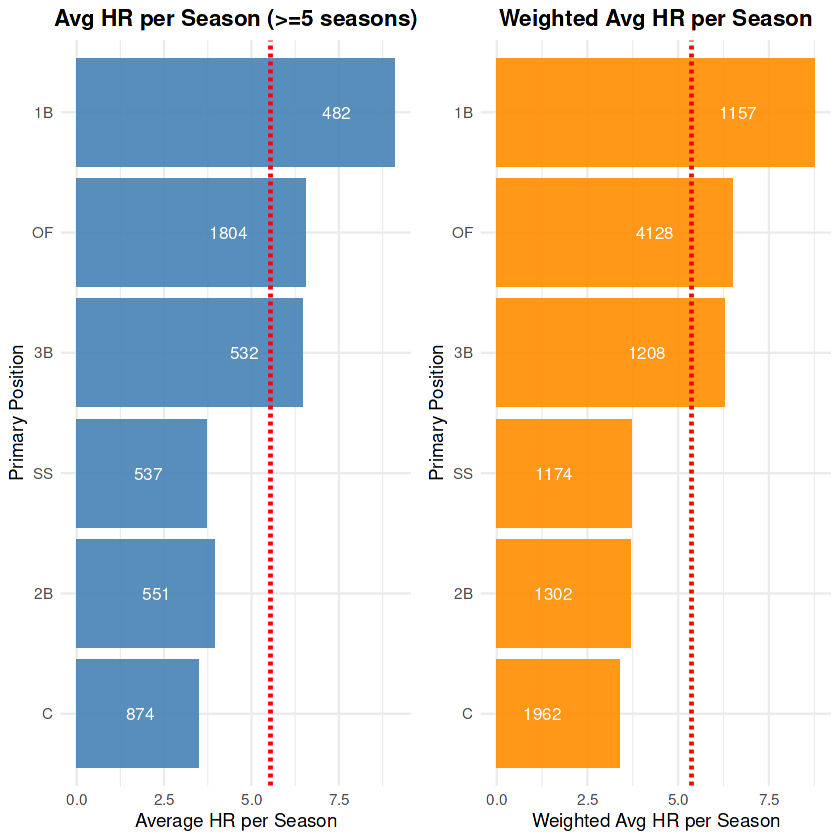

In [10]:
#make position orders match on charts
position_order <- c("C", "2B", "SS", "3B", "OF", "1B")

# Aggregate average HR per season by position
avg_hr_by_pos_filtered <- output %>% #table with player names and positions
  filter(total_years >= 5) %>% #players have played at least 5 seasons
filter(POS != "P") %>%
  group_by(POS) %>%
  summarise(
    avg_hr = mean(avg_hr_per_year, na.rm = TRUE),
    player_count = n(),
    .groups = "drop") %>%
  mutate(POS = factor(POS, levels = position_order)) 

#get h-line-Calculate overall average
overall_avg_hr <- mean(avg_hr_by_pos_filtered$avg_hr, na.rm = TRUE)

# Plot
p1 <- ggplot(avg_hr_by_pos_filtered, aes(x = POS, y = avg_hr)) +
  geom_col(fill = "steelblue", alpha = 0.9) +
geom_text(aes(label = player_count), hjust = 2.5, size = 3.5, color = "white") +
geom_hline(yintercept = overall_avg_hr, color = "red", linetype = "dashed", linewidth = 1) +
  coord_flip() +
  labs(
    title = "Avg HR per Season (>=5 seasons)",
    x = "Primary Position",
    y = "Average HR per Season"
  ) + theme_minimal() +
theme(plot.title = element_text(hjust=0.5, face = "bold")) 

#aggregate weighted average hr
avg_hr_by_pos_weighted <- output %>%
  filter(total_years >= 1) %>%
filter(POS != "P") %>%
  group_by(POS) %>%
drop_na() %>%
  summarise(
    weighted_avg_hr = sum(career_hr, na.rm = TRUE) / sum(total_years, na.rm = TRUE),
    player_count = n(),
    .groups = "drop")%>%
  mutate(POS = factor(POS, levels = position_order)) 

# Calculate weighted overall average - get H line
overall_weighted_avg <- mean(avg_hr_by_pos_weighted$weighted_avg_hr, na.rm = TRUE)

#plot
p2 <- ggplot(avg_hr_by_pos_weighted, aes(x = POS, y = weighted_avg_hr)) +
  geom_col(fill = "darkorange", alpha = 0.9) +
geom_text(aes(label = player_count), hjust = 2.5, size = 3.5, color = "white") +
geom_hline(yintercept = overall_weighted_avg, color = "red", linetype = "dashed", linewidth = 1) +
  coord_flip() +
  labs(
    x = "Primary Position",
    y = "Weighted Avg HR per Season") +  
theme_minimal() + ggtitle("Weighted Avg HR per Season") + 
theme(plot.title = element_text(hjust = 0.5, face="bold"))

library(cowplot) #package for combining plots
plot_grid(p1,p2)


 This section compares **raw average HR per season** (treating each player equally) with a **weighted average** that accounts for career length. Only players with **5 or more seasons** are included to ensure stability in the per-season metrics.

**Observations:**

* The **left chart** treats each player equally, showing the *mean HR per season* across all qualifying players by position.

* The **right chart** weights each player by the number of seasons they played—so **longer careers have greater influence**. This inflates values for positions with many durable power hitters.

* Positions like **1B, OF, and 3B** see a notable increase in the weighted chart, driven by prolific long-career sluggers.

* Meanwhile, **2B, SS, and C** see smaller gains or stay relatively flat, reflecting either **shorter average careers** or **fewer high-volume power hitters** extending their tenure.

* These differences reveal not just which positions produce the most power, but **whose sluggers last long enough to shape positional legacies**.

**Note:**

The left chart shows the average HR per season among players with careers of 5 or more seasons, treating each player equally. The right chart shows the weighted average HR per season, where players with longer careers have more influence.


## Normalizing by Position

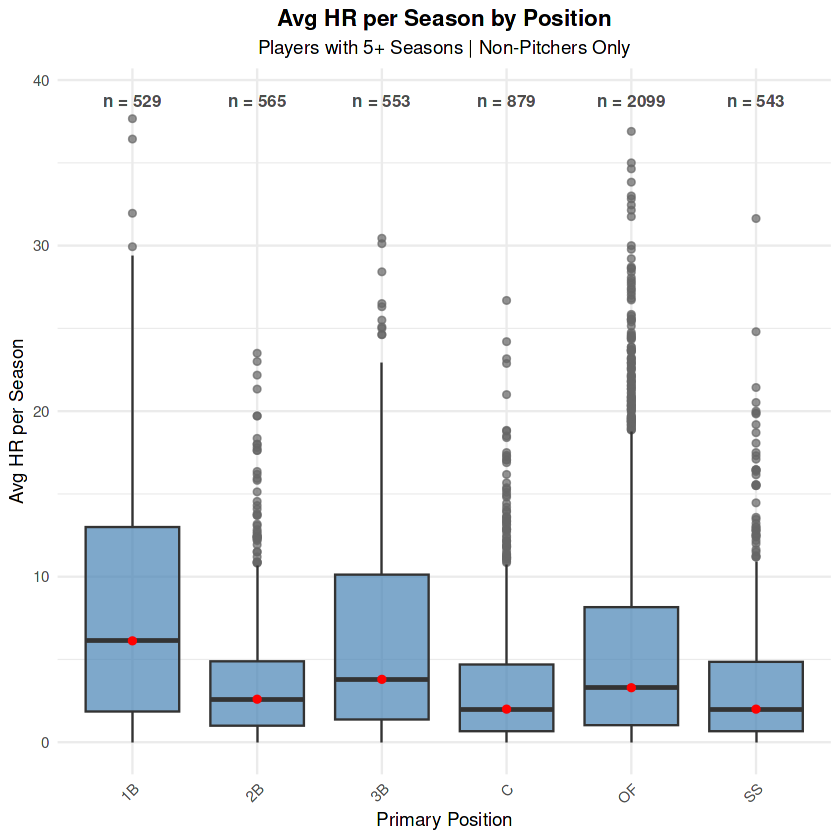

In [11]:
# Calculate HR per season per player
hr_season_summary <- lahman$Batting %>%
  filter(!is.na(HR)) %>%
  group_by(playerID) %>%
  summarise(
    total_hr = sum(HR, na.rm = TRUE),
    total_seasons = n_distinct(yearID),
    avg_hr_per_season = total_hr / total_seasons,
    .groups = "drop")

# Get primary position per player (excluding pitchers)
primary_pos <- lahman$Fielding %>%
  filter(!POS %in% c("P")) %>%
  group_by(playerID, POS) %>%
  summarise(games = sum(G, na.rm = TRUE), .groups = "drop") %>%
  group_by(playerID) %>%
  slice_max(order_by = games, n = 1, with_ties = FALSE) %>%
  ungroup()

# Merge and filter
hr_pos_summary <- hr_season_summary %>%
  inner_join(primary_pos, by = "playerID") %>%
  filter(total_seasons >= 5) #more than 5 seasons 

#get player counts for data clarity
player_counts <- hr_pos_summary %>%
count(POS, name="count")

# plot
ggplot(hr_pos_summary, aes(x = POS, y = avg_hr_per_season)) +
  geom_boxplot(fill = "steelblue", alpha = 0.7, outlier.color = "gray40") +
  stat_summary(fun = median, geom = "point", shape = 20, size = 2.5, color = "red") +
 geom_text(
    data = player_counts,
    aes(x = POS, y = max(hr_pos_summary$avg_hr_per_season) + 1.1, label = paste0("n = ", count)),
    inherit.aes = FALSE,
    size = 3.5,
    color = "gray30",
     fontface = "bold") +
  labs(
    title = "Avg HR per Season by Position",
    subtitle = "Players with 5+ Seasons | Non-Pitchers Only",
    x = "Primary Position",
    y = "Avg HR per Season") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1))

This boxplot explores avg HR per season by position in players with 5 or more seasons. Sample size (n = ) was included at the top for clarity.

**Observations:**

* **Second base** shows the **tightest interquartile range (IQR)**, suggesting consistently low HR output across most 2B players.

* **Shortstop** and **catcher** also show limited spread, but their **median HR output is similarly modest**.

* **Outfielders** exhibit **significantly greater variance**, which is expected given the **large sample size (n = 2,099)**—over double that of the next-largest group (catchers).

* Greater variance often reflects a mix of archetypes (e.g., power-hitting corner outfielders vs. speed-focused center fielders), further justifying **position-specific segmentation**.

* **Catchers** typically hit fewer home runs because teams often roster **multiple catchers**, which limits individual playing time and season totals. Additionally, catchers have been historically selected for **defensive skill sets rather than offensive output**.

* **First base** stand out with the **highest median and widest IQR**, reflecting **strong and consistent HR output**. However, the upper whisker **flattens below 30 HR/year**, with only a few outliers above. This plateau suggests a **ceiling effect**—many 1B reach near-top production, but few exceed it consistently.

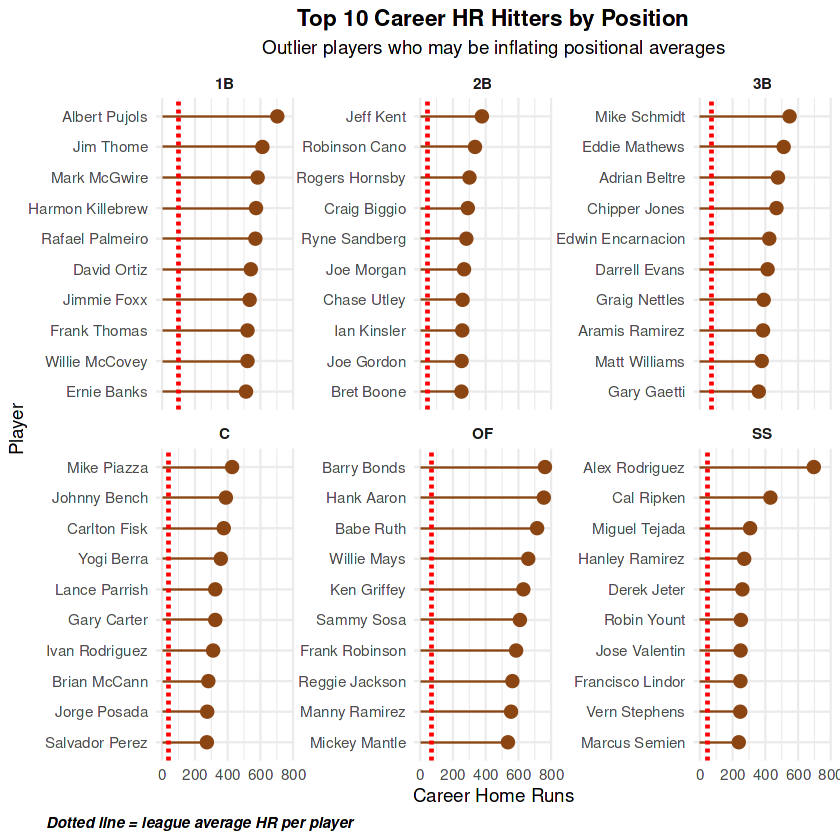

In [12]:
# Get Career HR per player
career_hr <- lahman$Batting %>%
  group_by(playerID) %>%
  summarise(career_hr = sum(HR, na.rm = TRUE), .groups = "drop")

# get Primary position
primary_pos <- lahman$Fielding %>%
  group_by(playerID, POS) %>%
  summarise(games = sum(G, na.rm = TRUE), .groups = "drop") %>%
  group_by(playerID) %>%
  slice_max(order_by = games, n = 1, with_ties = FALSE)

# get Player full names
player_names <- lahman$People %>%
  mutate(full_name = paste(nameFirst, nameLast)) %>%
  select(playerID, full_name)

# Merge and get top 10 by POS
top_hr_by_pos <- career_hr %>%
  left_join(primary_pos, by = "playerID") %>%
  left_join(player_names, by = "playerID") %>%
  filter(POS != "P") %>%
  group_by(POS) %>%
  slice_max(career_hr, n = 10) %>%
  ungroup()
#create factor
top_hr_by_pos <- top_hr_by_pos %>%
  group_by(POS) %>%
  mutate(full_name = factor(full_name, levels = full_name[order(career_hr)])) %>%
  ungroup()

#get career hr avg across entire league for line (trying to emphasize outliers)
pos_averages <- hr_pos_summary %>% #variable from earlier
  group_by(POS) %>%
  summarise(avg_career_hr = mean(total_hr, na.rm = TRUE), .groups = "drop")

#create plot
library(tidytext)
ggplot(top_hr_by_pos, aes(x = career_hr, y = reorder(full_name, career_hr))) +
  geom_segment(aes(x = 0, xend = career_hr, yend = full_name), color = "saddlebrown") +
  geom_point(color = "saddlebrown", size = 3) +
  facet_wrap(~ POS, scales = "free_y") +
  geom_vline(data = pos_averages, #plot league average line
             aes(xintercept = avg_career_hr), 
             color = "red", linetype = "dashed", linewidth = 1) +
  labs( title = "Top 10 Career HR Hitters by Position",
    subtitle = "Outlier players who may be inflating positional averages",
    caption = "Dotted line = league average HR per player",
    x = "Career Home Runs",
    y = "Player" ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    strip.text = element_text(face = "bold"),
    plot.subtitle = element_text(hjust= 0.5),  
    plot.caption = element_text(face = "bold.italic", hjust = -0.3))



This section highlights the **top 10 career home run hitters** at each primary position, illustrating how positional averages can be skewed by extraordinary individual performances. The **red dotted line** represents the overall league average HR per player.

**Observations:**

* These are **career home run totals**, so all players shown are retired. This view surfaces Hall of Fame names and helps assess which positions have historically been driven by dominant sluggers.

* The **outfield (OF)** stands out for its elite power, featuring names like **Barry Bonds, Hank Aaron, Babe Ruth, Willie Mays, Sammy Sosa, and Mickey Mantle**—a concentration of all-time greats far above league norms.

* **First base (1B)** and **third base (3B)** also show multiple players well above average, reflecting power-focused archetypes at those positions.

* Positions like **second base (2B)** and **shortstop (SS)** show less vertical separation. However, they still feature historically notable contributors—like **Rogers Hornsby**, who played during the **deadball era (1915–1937)** yet ranks second among 2B in career HRs. Similarly, **Joe Gordon**, active from 1938–1950, still ranks 9th, highlighting how rare long-term power has been at second base.

* **Mike Piazza** stands out in the **catcher** category, with HR totals significantly above the dotted line—underscoring his unique offensive production at a traditionally defense-first position.


## Contextual Trends

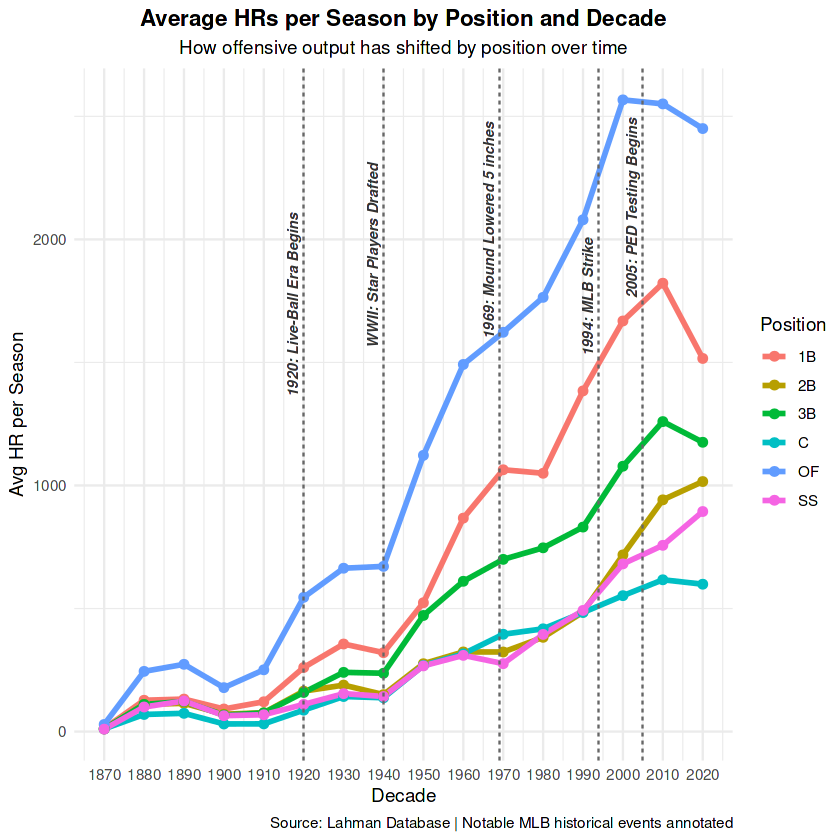

In [13]:
# Join Batting with Fielding to get position for each season
batting_pos <- lahman$Batting %>%
  filter(!is.na(HR)) %>%
  left_join(lahman$Fielding, by = c("playerID", "yearID", "teamID", "stint")) %>%
  filter(!is.na(POS), POS != "P")  # remove pitchers

#Assign each row to a decade
batting_pos <- batting_pos %>%
  mutate(decade = paste0(floor(yearID / 10) * 10))

#Calculate avg HR per season by POS and decade
hr_by_pos_decade <- batting_pos %>%
  group_by(decade, POS, yearID) %>%
  summarise(total_hr = sum(HR, na.rm = TRUE), .groups = "drop") %>%
  group_by(decade, POS) %>%
  summarise(avg_hr_per_season = mean(total_hr), .groups = "drop")

#plot 
ggplot(hr_by_pos_decade, aes(x = as.numeric(decade), y = avg_hr_per_season, color = POS, group = POS)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 2) + 
scale_x_continuous(breaks = seq(1870, 2020, by = 10)) +
geom_vline(xintercept = 1969, linetype = "dashed", color = "gray40") + # plotting 1969 mound lowering - mark start of 1970s decade since grouped by decades on plot
  annotate("text", 
         x = 1969, 
         y = max(hr_by_pos_decade$avg_hr_per_season, na.rm = TRUE), 
         label = "1969: Mound Lowered 5 inches", 
         angle = 90, vjust = -0.5, hjust = 1.1,
         size = 3, color = "gray20", fontface = "bold.italic") +
geom_vline(xintercept = 2005, linetype = "dashed", color = "gray40") + #plotting 2005 PED crackdown
annotate("text",
         x = 2005,
         y = max(hr_by_pos_decade$avg_hr_per_season, na.rm = TRUE),
         label = "2005: PED Testing Begins",
         angle = 90, vjust = -0.5, hjust = 1.1,
         size = 3, color = "gray20", fontface = "bold.italic") +
geom_vline(xintercept = 1994, linetype = "dashed", color = "gray40") + #plotting 1994 MLB strike
annotate("text", 
         x = 1994, 
         y = max(hr_by_pos_decade$avg_hr_per_season, na.rm = TRUE) * 0.95, 
         label = "1994: MLB Strike", 
         angle = 90, vjust = -0.5, hjust = 1.9,
         size = 3, color = "gray20", fontface = "bold.italic") +
geom_vline(xintercept = 1940, linetype = "dashed", color = "gray40") + #plotting WW2 impact
annotate("text",
         x = 1940,
         y = max(hr_by_pos_decade$avg_hr_per_season, na.rm = TRUE) * 0.93,
         label = "WWII: Star Players Drafted",
         angle = 90, vjust = -0.5, hjust = 1.1,
         size = 3, color = "gray20", fontface = "bold.italic") +
geom_vline(xintercept = 1920, linetype = "dashed", color = "gray40") + #plotting live-ball era (using different balls throughout game)
annotate("text",
         x = 1920,
         y = max(hr_by_pos_decade$avg_hr_per_season, na.rm = TRUE) * 0.85,
         label = "1920: Live-Ball Era Begins",
         angle = 90, vjust = -0.5, hjust = 1.1,
         size = 3, color = "gray20", fontface = "bold.italic") +
labs(
    title = "Average HRs per Season by Position and Decade",
    subtitle = "How offensive output has shifted by position over time",
    caption = "Source: Lahman Database | Notable MLB historical events annotated",
    x = "Decade",
    y = "Avg HR per Season",
    color = "Position") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"), plot.subtitle = element_text(hjust = 0.5))





This line chart tracks **average home runs per season by position and decade**, helping contextualize how power-hitting roles have evolved over time. By breaking trends out by position, we can observe both league-wide shifts and role-specific changes in offensive expectations.

**Observations:**

* **Across all positions**, HR output surged starting in the **1990s**, peaking in the **early 2000s** and again in the **2010s**, coinciding with the steroid era, changes to ball composition, and the modern launch-angle revolution.

* **Outfielders (OF)** peaked in the **2000s**, while **first basemen (1B)** and **third basemen (3B)** hit their highest marks in the **2010s**—reflecting their consistent role as cornerstone power positions.

* **Second basemen (2B)** and **shortstops (SS)** show a **continued upward trend into the 2020s**, indicating a shift toward more offensively capable middle infielders in the modern era.

* **Catchers (C)** saw a moderate peak in the **2010s**, with only a slight dip in the 2020s—suggesting stable, if modest, offensive contribution from the position.

* The **1990s–2010s** also marked a rise in **dual-threat players**—particularly at SS and 3B—who could contribute both defensively and offensively, redefining traditional role expectations.

**Insight:** This chart underscores the importance of **historical context** when comparing players across eras. Positional power ceilings evolve over time—so raw HR totals are best evaluated relative to both era and role.

---
**Note on the 1920's:**
* Before the **1920s**, the game was dominated by the "dead-ball" era, characterized by low-scoring games and an emphasis on speed, bunting, and small-ball tactics.

* The major reason being the MLB used **the same ball throughout the entire game**, even after it became scuffed, soft, or discolored—making it harder to see and much more difficult to hit for power.

* The **"live-ball era" began in 1920**, when MLB introduced **tightly wound, cleaner balls** and banned certain pitches like the spitball. These changes made it easier to drive the ball with power, leading to a dramatic rise in home runs—exemplified by **Babe Ruth**, who hit 54 HRs in 1920 alone after no player had hit more than 29 in a season prior.

* This shift fundamentally changed the role of hitters and began the modern focus on power hitting that continues to evolve today.


# A tibble: 6 × 4
  Position Avg_HR_1980_93 Avg_HR_2005_Present Percent_Change
  <chr>             <dbl>               <dbl>          <dbl>
1 1B                1069.               1698.           58.9
2 2B                 394.                915.          132. 
3 3B                 729.               1193.           63.7
4 C                  416                 592.           42.3
5 OF                1776.               2489.           40.2
6 SS                 394.                761.           93.0


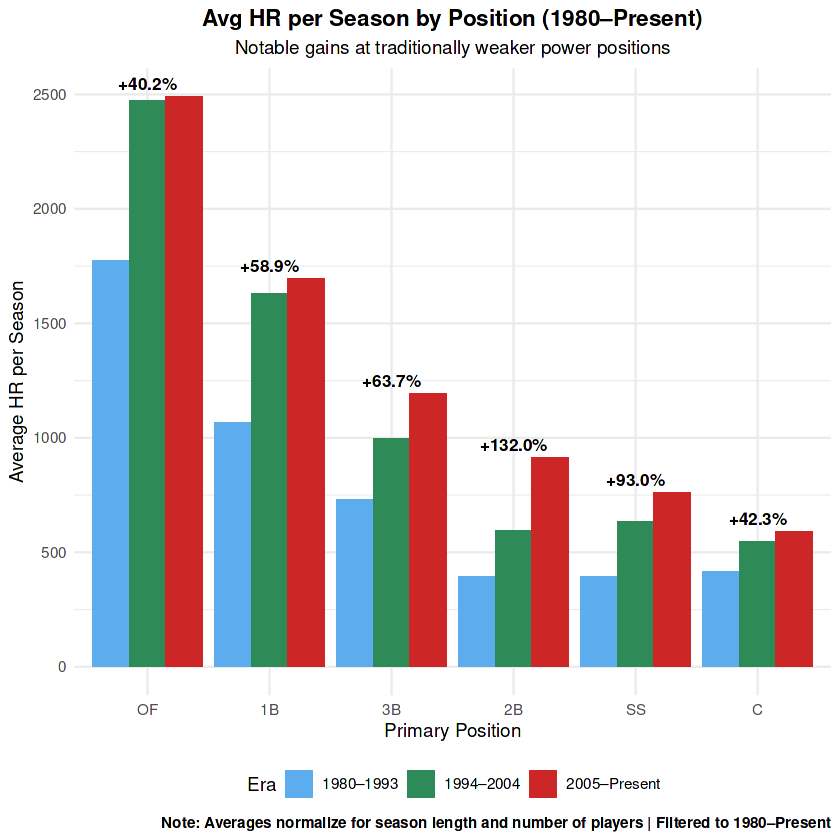

In [14]:
# Join Batting with Fielding to assign position per season
batting_pos <- lahman$Batting %>%
  filter(!is.na(HR)) %>%
  left_join(lahman$Fielding, by = c("playerID", "yearID", "teamID", "stint")) %>%
  filter(!is.na(POS), POS != "P")  # remove pitchers

# Step 2: Assign era based on year
batting_pos <- batting_pos %>%
  mutate(
   era = case_when(
      yearID >= 1980 & yearID <= 1993 ~ "1980–1993",
      yearID >= 1994 & yearID <= 2004 ~ "1994–2004",
      yearID >= 2005 ~ "2005–Present",
       TRUE ~ NA_character_  # catch-all
    )
  ) %>%
filter(!is.na(era))

# Calculate total HR per position-season
hr_per_season <- batting_pos %>%
  group_by(yearID, POS, era) %>%
  summarise(total_hr = sum(HR, na.rm = TRUE), .groups = "drop")

# Calculate average HR per season by position and era
avg_hr_by_pos_era <- hr_per_season %>%
  group_by(POS, era) %>%
  summarise(avg_hr = mean(total_hr), .groups = "drop")

# Order eras and plot
avg_hr_by_pos_era$era <- factor(avg_hr_by_pos_era$era, levels = c("1980–1993", "1994–2004", "2005–Present"))

# Create summary table for 1980–1993 and 2005–Present only - get % change
avg_hr_summary <- avg_hr_by_pos_era %>%
  filter(era %in% c("1980–1993", "2005–Present")) %>%
  pivot_wider(names_from = era, values_from = avg_hr, names_prefix = "avg_hr_") %>%
  mutate(percent_change = (`avg_hr_2005–Present` - `avg_hr_1980–1993`) / `avg_hr_1980–1993` * 100)
# Clean column names for display
colnames(avg_hr_summary) <- c("Position", "Avg_HR_1980_93", "Avg_HR_2005_Present", "Percent_Change")
# Print table
print(avg_hr_summary)
#create annotation label
annotation_data <- data.frame(
  POS = c("OF", "1B", "3B", "2B", "SS", "C"),
  era = "2005–Present",
  avg_hr = c(
    avg_hr_summary$Avg_HR_2005_Present[avg_hr_summary$Position == "OF"],
    avg_hr_summary$Avg_HR_2005_Present[avg_hr_summary$Position == "1B"],
    avg_hr_summary$Avg_HR_2005_Present[avg_hr_summary$Position == "3B"],
    avg_hr_summary$Avg_HR_2005_Present[avg_hr_summary$Position == "2B"],
    avg_hr_summary$Avg_HR_2005_Present[avg_hr_summary$Position == "SS"],
    avg_hr_summary$Avg_HR_2005_Present[avg_hr_summary$Position == "C"]),
  label = c("+40.2%", "+58.9%", "+63.7%", "+132.0%", "+93.0%", "+42.3%"))

#create plot
ggplot(avg_hr_by_pos_era, aes(x = POS, y = avg_hr, fill = era)) +
  geom_col(position = "dodge") +
scale_x_discrete(limits = c("OF", "1B", "3B", "2B", "SS", "C")) +
  scale_fill_manual(
      values = c("1980–1993" = "steelblue2", 
             "1994–2004" = "seagreen4", 
             "2005–Present" = "firebrick3")) +
 geom_text(
    data = annotation_data,
    aes(x = POS, y = avg_hr, label = label),
    vjust = -0.5,
    fontface = "bold",
    color = "black",
    size = 3.5) +
  labs(
    title = "Avg HR per Season by Position (1980–Present)",
    subtitle = "Notable gains at traditionally weaker power positions",
    x = "Primary Position",
    y = "Average HR per Season",
    fill = "Era",
    caption = "Note: Averages normalize for season length and number of players | Filtered to 1980–Present") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
       legend.position = "bottom",
       plot.caption = element_text(hjust = 1, face = "bold"))


**Observations:**

* The percentages shown above the red bars represent the **percent change** in average HR per season from **1980–1993 to 2005–Present**, measuring how much each position’s offensive output has grown over time.

* **Middle infielders have made the largest gains**:  
  * **Shortstops (SS): +93.0%**  
  * **Second basemen (2B): +132.0%**  
  These increases highlight a shift in how these positions are scouted and developed, power is no longer exclusive to the corners.

* **Third base (3B)** also shows substantial growth (**+63.7%**), suggesting broader power development across the infield.

* **Outfielders (OF)** remain the most prolific home run producers in raw volume, but their percent change (**+40.2%**) is the smallest margin, reflecting that they already started from a high power baseline.

* **Catcher (C)** saw more limited gains, with **+42.3%**. This role has historically been associated with power constraints, which may explain the more gradual growth.

* This visualization underscores the **evolution of positional archetypes**, with historically defense-first roles now contributing meaningfully to team power output.

---

**Scouting Implication:**

The dramatic rise in HR output from historically defense-first positions (**2B, SS, C**) indicates a **broadening offensive skill set** among these roles. Scouts and analysts may benefit from **recalibrating positional benchmarks**, especially when evaluating **amateur prospects or minor league talent** with emerging power profiles.


## Synthesizing Archetypes

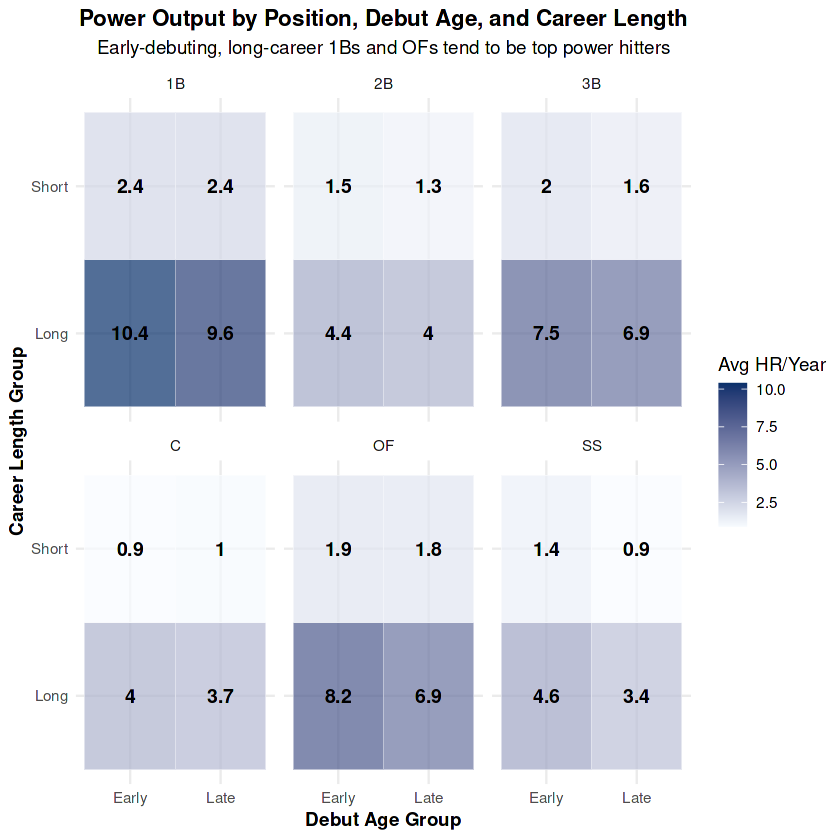

In [15]:
# Prep Key Fields per Player - want a player-level summary with these features
player_summary <- lahman$Batting %>%
  filter(!is.na(HR)) %>%
  group_by(playerID) %>%
  summarise(
    total_HR = sum(HR, na.rm = TRUE),
    first_year = min(yearID),
    last_year = max(yearID),
    career_length = last_year - first_year + 1,
    avg_HR_per_year = total_HR / career_length
  ) %>%
  left_join(select(lahman$People, playerID, birthYear), by = "playerID") %>%
  mutate(age_at_debut = first_year - birthYear)

#Add Primary Position - Join with Fielding to find each player’s most common position:
primary_pos <- lahman$Fielding %>%
  group_by(playerID, POS) %>%
  summarise(games = sum(G, na.rm = TRUE), .groups = "drop") %>%
  group_by(playerID) %>%
  slice_max(order_by = games, n = 1) %>%
  ungroup()
#join tables
player_summary <- player_summary %>%
  left_join(primary_pos, by = "playerID") %>%
  filter(POS != "P", !is.na(age_at_debut), !is.na(POS))

#Create Archetype Buckets - define simple segments:
player_summary <- player_summary %>%
  mutate(
    debut_group = if_else(age_at_debut < 24, "Early", "Late"),
    career_group = if_else(career_length >= 10, "Long", "Short"))

#Summarize into Archetypes - create a table that shows average HRs for each segment:
archetype_table <- player_summary %>%
  group_by(debut_group, career_group, POS) %>%
  summarise(
    count = n(),
    avg_hr_per_year = round(mean(avg_HR_per_year, na.rm = TRUE), 1),
    avg_total_hr = round(mean(total_HR, na.rm = TRUE), 1),
    .groups = "drop") %>%
filter(count >= 10)

#plot
ggplot(archetype_table, aes(x = debut_group, y = career_group, fill = avg_hr_per_year)) +
  geom_tile(aes(fill = avg_hr_per_year), color = "white", alpha = 0.7) +
  geom_text(aes(label = avg_hr_per_year), size = 4, fontface = "bold", color = "black") +
scale_fill_gradient(low = "#f7fbff", high = "#08306b", name = "Avg HR/Year") +
  facet_wrap(~ POS) +
  labs(
    title = "Power Output by Position, Debut Age, and Career Length",
    subtitle = "Early-debuting, long-career 1Bs and OFs tend to be top power hitters",
    x = "Debut Age Group",
    y = "Career Length Group") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title = element_text(face = "bold"))



This heatmap breaks down **average home runs per year** by position, debut age group (early vs. late), and career length (short vs. long). The goal is to surface common **power-hitter archetypes** based on player profiles.

**Observations:**

- **Top performers**:
  * **Early-debuting, long-career 1B** stand out as the most prolific power group, averaging **10.4 HR/year**.
  * **Late-debuting, long-career 1B** also deliver strong output at **9.6 HR/year**, showing that both early and late starters at first base can sustain elite power.
  * **Outfielders (OF)** and **third basemen (3B)** with long careers and early debuts also show strong numbers, averaging **8.2 HR/year** and **7.5 HR/year**, respectively.

- **Weaker power profiles**:
  * **Catchers (C)** consistently produce the **lowest HR/year averages**, especially among short-career players. Early-debuting, short-career catchers average just **0.9 HR/year**, while late-debuting short-career catchers average **1.0 HR/year** — the only position where late-debut output slightly exceeds early debut, albeit marginally.
  * **Shortstops (SS)** and **second basemen (2B)** with short careers also fall near the bottom, reinforcing the defensive emphasis at these positions historically.

- **Notable trends**:
  * Players with **long careers** generally produce more HRs per year across all positions.
  * **Early debut + long career** tends to be the most potent combination, particularly at offensive-leaning positions.

---

This archetype analysis can inform **fantasy strategy**, **historical comparisons**, or even **scouting pipelines**, especially when looking for undervalued power potential outside traditional slugging roles.


# Conclusion

##  Takeaways

This analysis uncovers how home run production has evolved across positions in Major League Baseball over the last century. While corner infielders and outfielders have traditionally led in power, the data reveals **significant growth at middle infield positions**, particularly since the early 2000s.

**Key Takeaways:**

* **Middle infield power is no longer rare.** Shortstops and second basemen have seen the steepest percentage increases in HR production since 1980, reflecting shifts in development priorities and scouting profiles.

* **Debut age and career length matter.** Early-debuting players with longer careers tend to deliver the highest career and yearly HR output. These traits often indicate physical readiness and long-term upside.

* **Certain positions rely more on outliers.** Some roles (e.g., outfield) show greater dependence on historical icons to pull averages upward, while others (e.g., 2B, SS) show broader, more recent gains spread across cohorts.

* **Second Base (2B)** has shown considerable gains in avg HRs since 1980, but its top-end output remains modest. It's a position where power has broadened across players, even if ceilings haven't dramatically shifted. 

* **Catcher remains an exception.** Despite marginal gains, catcher still produces fewer HRs per season on average, largely due to role-sharing and defensive priority in roster construction.

* **Power-hitter archetypes vary across positions.** Traditional slugging roles like 1B and OF tend to reward longevity and early debuts, while defense-first positions like C and SS remain limited in ceiling, especially for players with short careers.

* **External changes shape power eras**. Rule changes (e.g., **lowering the mound in 1969**), league-wide events (e.g., the **1994 strike**), and policy shifts (e.g., **PED crackdowns**) have all affected home run trends at different points in history. These external variables should be considered when interpreting growth patterns, especially when comparing eras.

These findings highlight the **changing shape of positional expectations**, helping teams and analysts rethink how they project future power contributions.


##  Strategic Recommendations

For front offices, analysts, and even fantasy drafters, these historical trends offer actionable insights:

* **Update positional benchmarks.** Traditional assumptions about “non-power positions” may understate current offensive potential at 2B and SS. Factor in these evolving baselines when scouting, trading, or building rosters.

* **Scout for early bloomers with staying power.** Players who debut younger and remain healthy tend to produce outsized power over time, especially at already-offensive positions like 1B and OF.

* **Incorporate position-specific aging curves.** Career HR trends vary by position. Recognize where early peaks are typical (e.g., catcher) versus roles where power builds steadily (e.g., 3B or SS).

* **Contextualize standout players within historical norms.** A 25-HR season from a shortstop today carries different weight than it did 30 years ago. Use historical comparison to assess true outlier performance.

* **Apply historical segmentation to fantasy drafts.** Understanding which positions have become deeper in power potential can reveal value picks and shift roster strategy.

**Historical power data is predictive.** Teams and analysts who understand positional evolution can better forecast talent, build balanced lineups, and adapt to changing trends across baseball.

##  Looking Ahead

This analysis provides a foundational view of historical power trends by position, but there’s other variables to explore. 

Future analysis could expand in several directions:

* **Incorporate additional metrics** like plate appearances, slugging percentage, park factors (e.g., hitter-friendly, minor league), or handedness to better contextualize power output beyond home run totals.
* **Investigate player evolution** over time by examining injury history, position changes, and career aging curves to see how roles adapt and sustain power.
* **Track the long-term impact of the universal Designated Hitter (DH) rule**, especially in the National League, where its 2022 adoption removed pitchers from batting entirely. This change could subtly shift position-based power dynamics moving forward.
* **Identify emerging player archetypes** in the 2020s, particularly as front offices and development programs emphasize power across traditionally defense-first roles.

As Major League Baseball continues to evolve, so too must the models we use to evaluate player performance. Ongoing tracking of these trends will be critical for both fantasy drafters and front office analysts looking to project power potential and build competitive rosters in a changing landscape.
